## Day 23 PCA
18/Jan/2022, Tuesday

### PCA
- Dimension reduction technique
- Curse of dimensionality
- For visualization purpose

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [6]:
import numpy as np

In [18]:
## Create Data
x1, x2 = make_regression(n_samples=200, n_features=1, bias=30, noise=15, random_state=43)
print(x1.shape, x2.shape)

(200, 1) (200,)


In [19]:
X = np.concatenate([x1, x2.reshape(-1,1)], axis=1)
print(X.shape)

(200, 2)


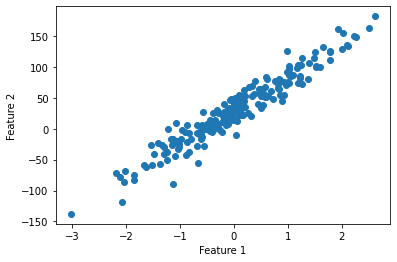

In [21]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [25]:
## Centering data around mean
mean = X.mean(axis=0)
print(mean)
X_centered = X-mean
print(X_centered.mean(axis=0))

[ 0.03957582 31.65458728]
[-1.11022302e-17 -8.66862138e-15]


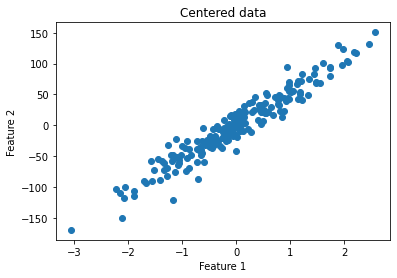

In [27]:
plt.scatter(X_centered[:,0], X_centered[:,1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Centered data")
plt.show()

In [28]:
## Principal components, eigen vectors 
eigenvalues, eigenvectors = np.linalg.eig(X_centered.T.dot(X_centered))
print(eigenvalues)
print(eigenvectors)

[1.45705093e+01 6.21056319e+05]
[[-0.9998493  -0.01736025]
 [ 0.01736025 -0.9998493 ]]


In [31]:
eigen_vector1 = eigenvectors[:,1]
eigen_val1 = eigenvalues[1]
eigen_vector2 = eigenvectors[:,0]
eigen_val2 = eigenvalues[0]

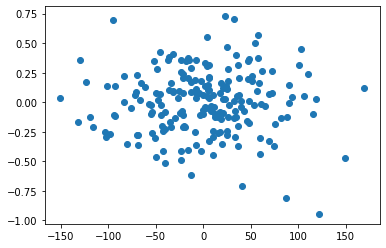

In [32]:
f1 = X_centered.dot(eigen_vector1)
f2 = X_centered.dot(eigen_vector2)
plt.scatter(f1, f2)
plt.show()

In [51]:
pca = PCA(n_components=2) # creating instance of PCA

In [52]:
pca.fit(X_centered) # computing eigen vectors of X matrix

PCA(n_components=2)

In [53]:
pca.explained_variance_ # variance explained by each eigen vector

array([3.12088603e+03, 7.32186397e-02])

In [54]:
pca.n_components_ # no. of PCs

2

In [55]:
X_ = pca.transform(X_centered) # projecting data on eigen vectors

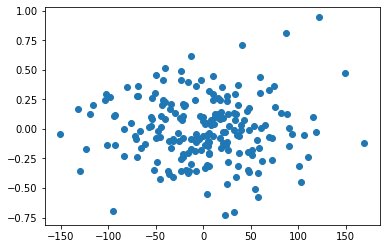

In [56]:
plt.scatter(X_[:,0], X_[:,1])
plt.show()

In [57]:
X_.var(axis=0)

array([3.10528160e+03, 7.28525465e-02])

In [64]:
# how to select number of components
cum_sum = np.cumsum(pca.explained_variance_ratio_ )
n_components = np.argmax(cum_sum>=0.95)+1
print(n_components) # feature reduction

1


In [59]:
pca.explained_variance_ratio_

array([9.99976540e-01, 2.34602998e-05])

In [65]:
pca.explained_variance_/np.sum(pca.explained_variance_) # computation of explained_variance_ratio_

array([9.99976540e-01, 2.34602998e-05])